## **Import needed libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import warnings 
warnings.filterwarnings('ignore')

## **EDA**

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

#### Age is the biggest influence on death event and thats logic

In [6]:
fig = px.histogram(df,x= 'DEATH_EVENT' , color='sex' , hover_data=df.columns , barmode='group')
fig.show()

In [7]:
fig = px.histogram(df , x='sex' , hover_data=df.columns ,color='sex' , title='sex ratio in data')
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

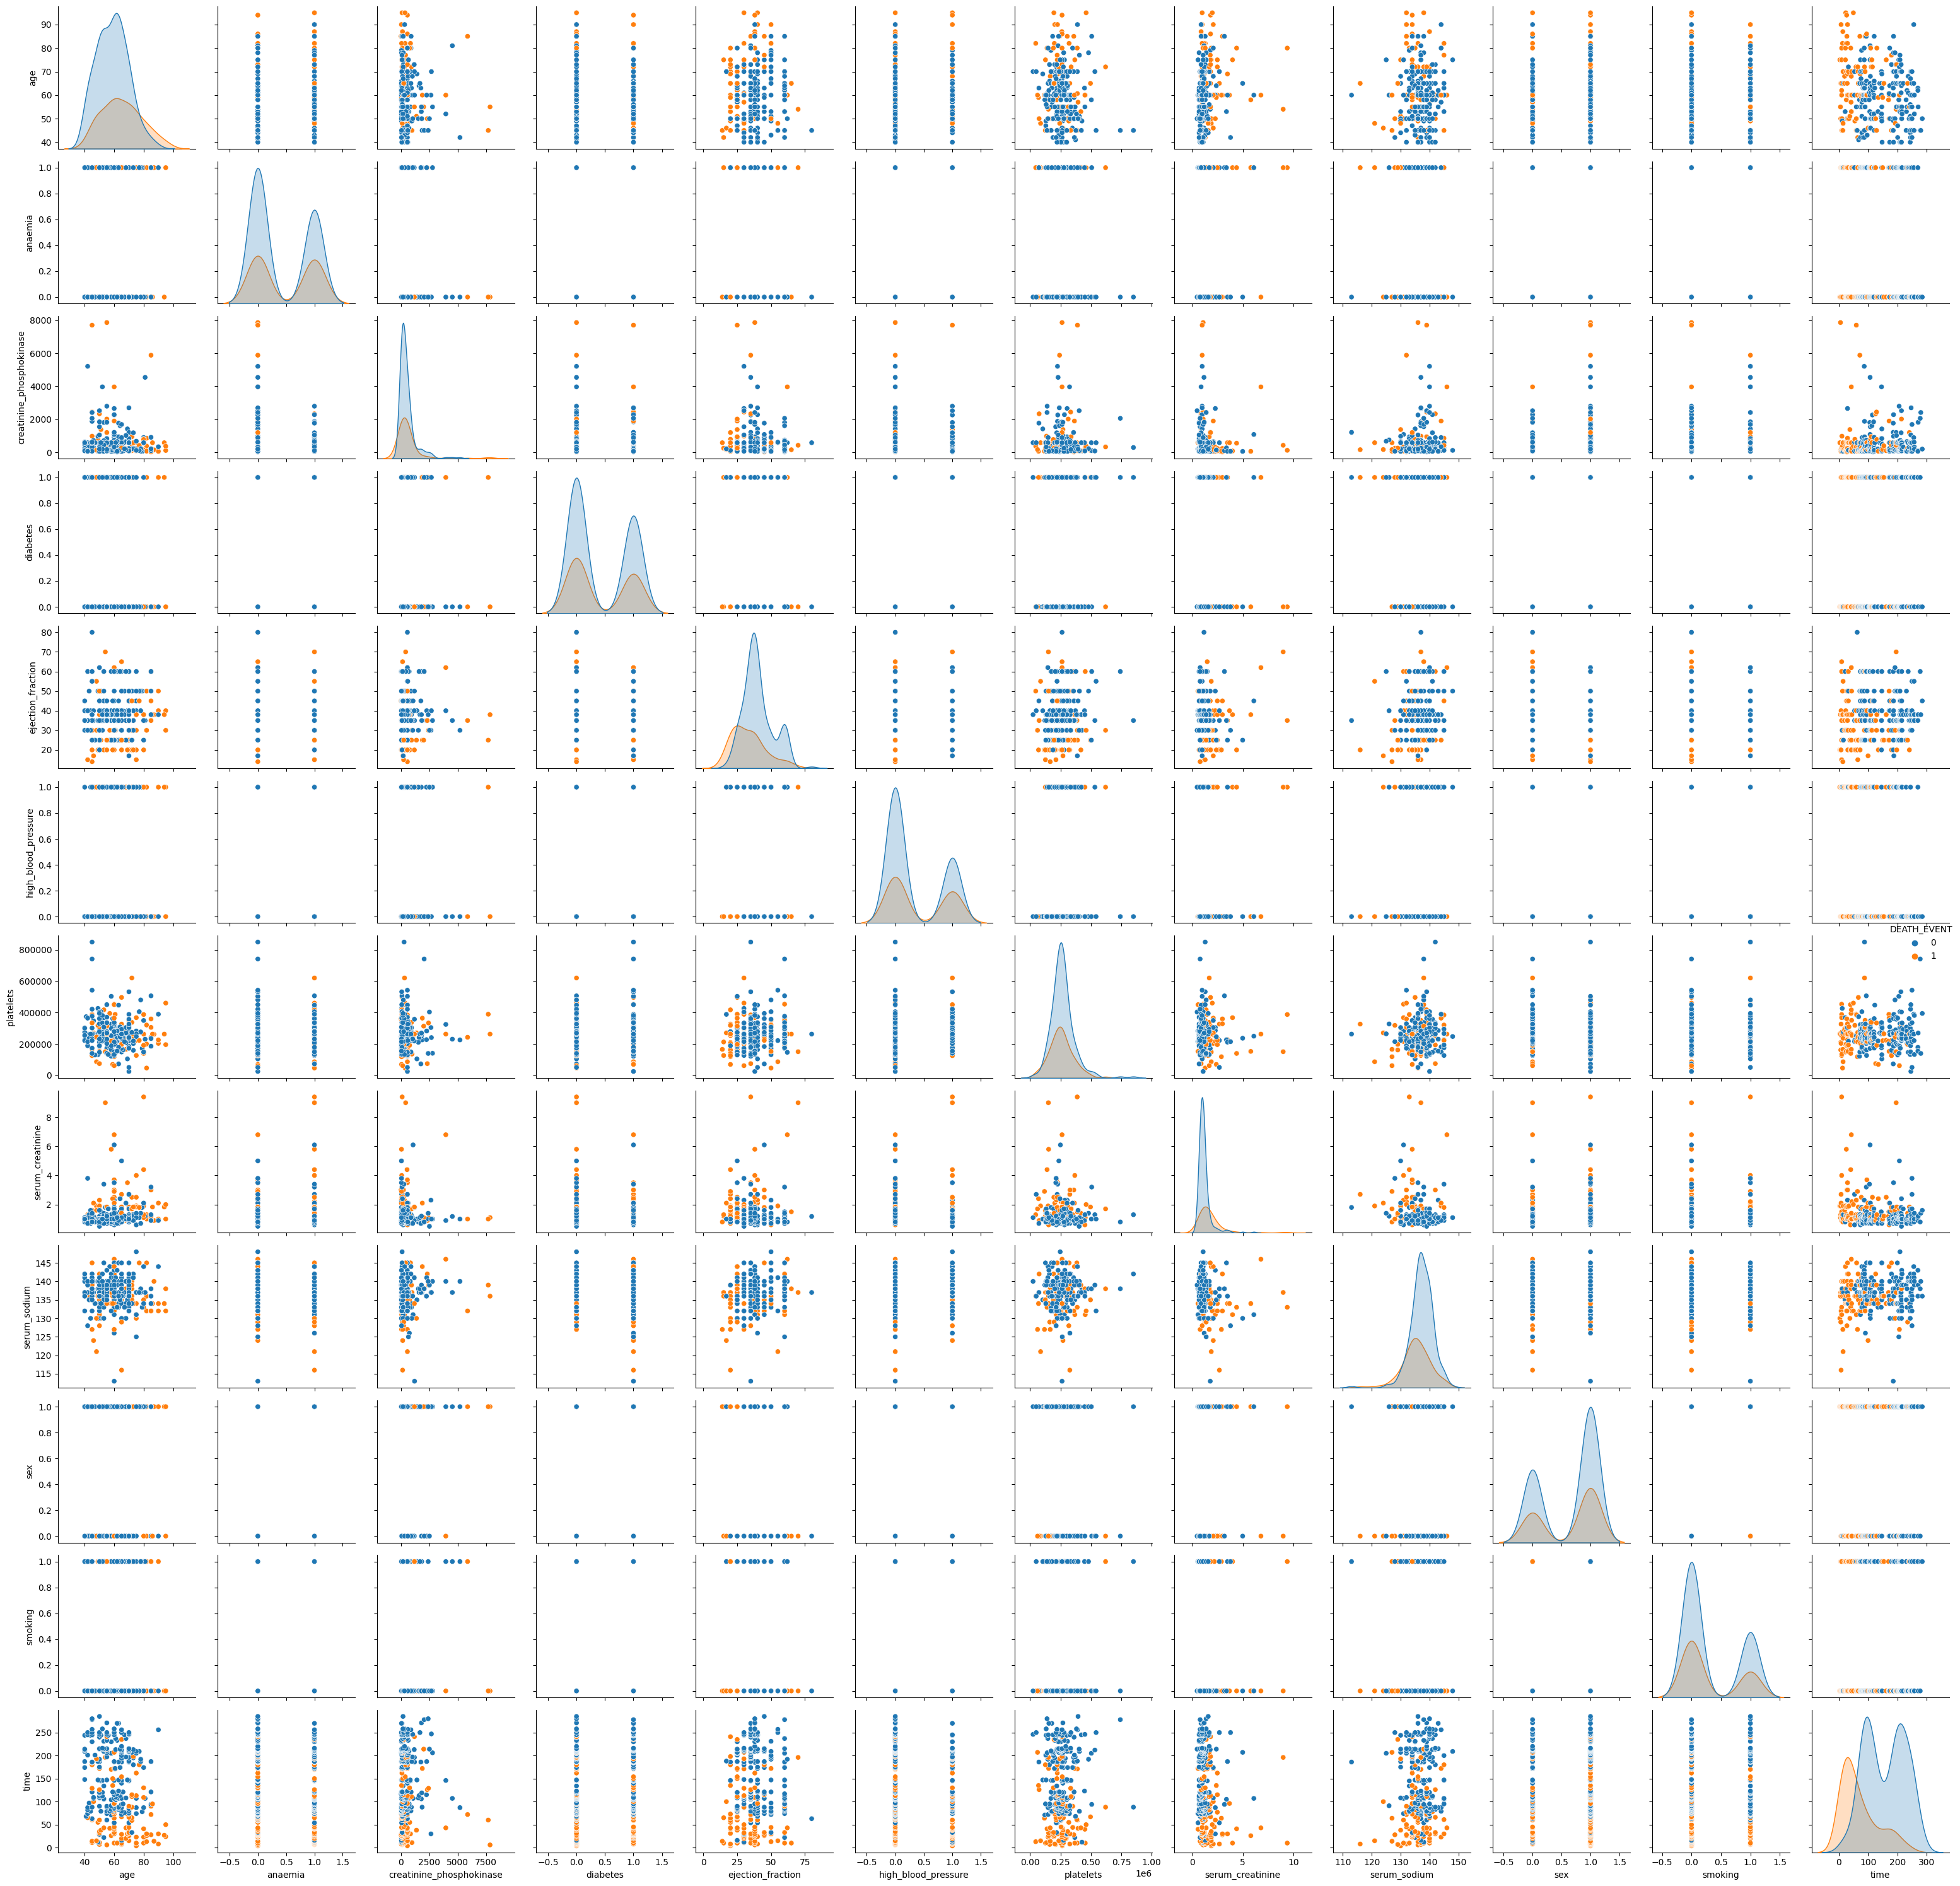

In [8]:
plt.figure(figsize=(15,10))
sns.pairplot(df , hue = 'DEATH_EVENT')
plt.tight_layout()
plt.plot()

In [9]:
fig = px.box(df , y = 'age' , x = 'DEATH_EVENT' , title='Distribution of age')
fig.show()

## **Preprocessing**

### Define features and target

In [10]:
# Features = ['time','ejection_fraction','serum_creatinine']
X = df.drop('DEATH_EVENT' , axis='columns')
y = df['DEATH_EVENT']

## Scaling

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.1 , random_state= 42 , shuffle= True)

## **Machine Learning Models**

### **1. Logistic Regression Model**

In [13]:
lr_model = LogisticRegression(penalty='l2' , C= 15 ,max_iter=1000)
lr_model.fit(X_train , y_train)

LogisticRegression(C=15, max_iter=1000)

In [14]:
lr_model.score(X_train , y_train)

0.8661710037174721

In [15]:
lr_pred = lr_model.predict(X_test)

In [16]:
accuracy_score(y_test , lr_pred)

0.7666666666666667

### **2. Decision Tree Model**

In [17]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [18]:
DT_model.score(X_train , y_train)

1.0

In [19]:
DT_pred = DT_model.predict(X_test)

In [20]:
accuracy_score(y_test , DT_pred)

0.7333333333333333

#### Overfitting happened in this model

### **3. Random Forest Model**

In [21]:
RF_model = RandomForestClassifier(n_estimators=1000)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=1000)

In [22]:
RF_model.score(X_train , y_train) 

1.0

In [23]:
RF_pred = RF_model.predict(X_test)

In [24]:
accuracy_score(y_test , RF_pred)

0.7333333333333333

### **4. SVC**

In [25]:
svc = SVC(gamma='auto' , C=6)
svc.fit(X_train , y_train)

SVC(C=6, gamma='auto')

In [26]:
svc.score(X_train , y_train)

0.8661710037174721

In [27]:
svc.score(X_test , y_test)

0.8

## **Conclusion**

#### The models are going to overfitting but the best one is SVC with accuracy 86% which is less in overfitting and to make it has higher accuracy we can get more data as this data seems small